# Implementing PCA using Scikit-Learn

I will use the MNIST data set as an example to walk you through the implementation of PCA using Scikit-learn.

## 1. Import MNIST dataset

In [ ]:
#from six.moves import urllib
#from sklearn.datasets import fetch_openml
#mnist = fetch_openml('MNIST original')  # This is supposed to work but for some unknown reason, it does not work ---03/28/2019
#X = mnist["data"]
#y = mnist["target"]

In [2]:
from scipy.io import loadmat
mnist = loadmat("../mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]

In [3]:
X = mnist_data
y = mnist_label

Let us check the dimension of the data X.

In [4]:
X.shape

(70000, 784)

## 2. Implement PCA

In [16]:
from sklearn.decomposition import PCA

Now, we need to specify how many principal components we need. Let us assume 154 for now.

In [6]:
MyPCA = PCA(n_components = 154)

Now, we are ready to run PCA on the MNIST data.

In [7]:
X_reduced = MyPCA.fit_transform(X)

Now, let us check the dimension of X_reduced which is a lower dimensional representation of the orginal dataset X.

In [8]:
X_reduced.shape

(70000, 154)

That is it! We have obtained a lower dimensional version  of the original MNIST dataset.

We can also tranform this lower dimensional dataset back to the original high dimensional space.

In [9]:
X_recovered = MyPCA.inverse_transform(X_reduced)

Let us plot up some of the original MNIST digits and its compressed counterparts.

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

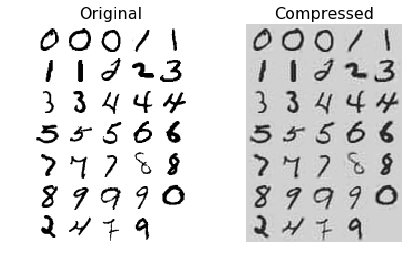

In [11]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

You probably have noticed that the there is some slight image quality loss (due to the fact that we threw away some information by using only 154 principla components). But overall, the compressed images are pretty good!

## 3. Choose the right number of principal components

Remember that, variation is information! If there is no varation among the data along some dimension (or axis), then that dimension is useless, and therefore, can be discarded. We want to keep the dimensions (or, axes) along which there are a lot of variations.

So, one way of choosing the number of dimensions (or the number of principal components) is to make sure that they capture a sufficiently large portion of the variance (e.g., 95%) in your data.

The following code implements PCA without reducing dimensionality, and computes the minimum number of dimensions required to preserve 95% of the variance in the training data.

In [12]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95) + 1

In [13]:
d

154

You got 154! So, you need at least 154 dimensions (or, principal components) in order to perserve 95% of the variance (or synynomously, the information) in the data.

You can also plot the explained variance as a function of the number of pricipal components.

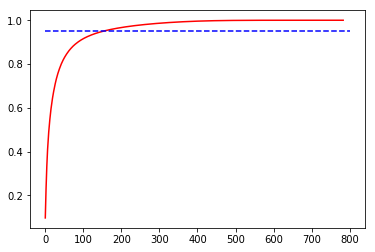

In [14]:
plt.plot(np.arange(784),cumsum,'-r')
plt.plot([0,800],[0.95,0.95],'b--')
plt.show()

Alternatively, you could set *n_components* to a float between 0 and 1.0, indicating the ratio of variance that you want to preserve.

In [15]:
MyNewPCA = PCA(n_components = 0.95)
X_reduced = MyNewPCA.fit_transform(X)

The Scikit-Learn automatically figured out how many principal components you need to perserve the amount of variance that you specified.